# DATA SETUP

## LIBRARIES AND DATA

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv("/content/First_800_Rows.csv", low_memory=False)

## CHECKING AND HANDLING POSSIBLE NULL VALUES

In [ ]:
data.isnull().sum()

OBS#                0
CHK_ACCT            0
DURATION            0
HISTORY             0
NEW_CAR             0
USED_CAR            0
FURNITURE           0
RADIO/TV            0
EDUCATION           0
RETRAINING          0
AMOUNT              0
SAV_ACCT            0
EMPLOYMENT          0
INSTALL_RATE        0
MALE_DIV            0
MALE_SINGLE         0
MALE_MAR_or_WID     0
CO-APPLICANT        0
GUARANTOR           0
PRESENT_RESIDENT    0
REAL_ESTATE         0
PROP_UNKN_NONE      0
AGE                 0
OTHER_INSTALL       0
RENT                0
OWN_RES             0
NUM_CREDITS         0
JOB                 0
NUM_DEPENDENTS      0
TELEPHONE           0
FOREIGN             0
DEFAULT             0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   OBS#              800 non-null    int64
 1   CHK_ACCT          800 non-null    int64
 2   DURATION          800 non-null    int64
 3   HISTORY           800 non-null    int64
 4   NEW_CAR           800 non-null    int64
 5   USED_CAR          800 non-null    int64
 6   FURNITURE         800 non-null    int64
 7   RADIO/TV          800 non-null    int64
 8   EDUCATION         800 non-null    int64
 9   RETRAINING        800 non-null    int64
 10  AMOUNT            800 non-null    int64
 11  SAV_ACCT          800 non-null    int64
 12  EMPLOYMENT        800 non-null    int64
 13  INSTALL_RATE      800 non-null    int64
 14  MALE_DIV          800 non-null    int64
 15  MALE_SINGLE       800 non-null    int64
 16  MALE_MAR_or_WID   800 non-null    int64
 17  CO-APPLICANT      800 non-null    i

# FEATURE ENGINEERING AND SELECTION

## CATEGORIZE COLUMNS AS 'BINARY', 'CATEGORICAL', OR 'CONTINUOUS'.

In [ ]:
categorical_columns = ['CHK_ACCT', 'HISTORY', 'SAV_ACCT', 'EMPLOYMENT', 'PRESENT_RESIDENT', 'JOB']


In [ ]:
numerical_columns = ['DURATION', 'AMOUNT', 'AGE', 'INSTALL_RATE', 'NUM_CREDITS', 'NUM_DEPENDENTS']

scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [ ]:
binary_columns = ['NEW_CAR', 'USED_CAR', 'FURNITURE', 'RADIO/TV', 'EDUCATION', 'RETRAINING', 'MALE_DIV',
                  'MALE_SINGLE', 'MALE_MAR_or_WID', 'CO-APPLICANT', 'GUARANTOR', 'REAL_ESTATE', 'PROP_UNKN_NONE',
                  'OTHER_INSTALL', 'RENT', 'OWN_RES', 'TELEPHONE', 'FOREIGN', 'DEFAULT']
data[binary_columns] = data[binary_columns].astype(int)

## LOGIT

### CHECK SIGNIFICANCE OF NUMERICAL

In [ ]:
numerical_columns = ['DURATION', 'AMOUNT', 'INSTALL_RATE', 'AGE']

numerical_data = data_with_dummies[numerical_columns + ['DEFAULT']]

y_numerical = numerical_data['DEFAULT']
X_numerical = numerical_data.drop('DEFAULT', axis=1)

X_numerical = sm.add_constant(X_numerical)

logit_model_numerical = sm.Logit(y_numerical, X_numerical)
logit_result_numerical = logit_model_numerical.fit()

logit_summary_numerical = logit_result_numerical.summary()
logit_summary_numerical


Optimization terminated successfully.
         Current function value: 0.577621
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                DEFAULT   No. Observations:                  800
Model:                          Logit   Df Residuals:                      795
Method:                           MLE   Df Model:                            4
Date:                Wed, 27 Mar 2024   Pseudo R-squ.:                 0.05277
Time:                        06:16:37   Log-Likelihood:                -462.10
converged:                       True   LL-Null:                       -487.84
Covariance Type:            nonrobust   LLR p-value:                 1.764e-10
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.9137      0.082    -11.193      0.000      -1.074      -0.754
DURATION         0.2966      0.103      2.866      0.004       0.094       0.499
AMOUNT           0.2091      0.107      1.956      0.050      -0.000       0.419
INSTALL_RATE     0.2822      0.091      3.099      0.002       0.104       0.461
AGE             -0.2592      0.087     -2.983      0.003      -0.430      -0.089
================================================================================
"""

### CHECK SIGNIFICANCE OF BINARY

In [ ]:
binary_columns = ['NEW_CAR', 'USED_CAR', 'FURNITURE', 'RADIO/TV', 'EDUCATION', 'RETRAINING', 'MALE_DIV',
                  'MALE_SINGLE', 'MALE_MAR_or_WID', 'CO-APPLICANT', 'GUARANTOR', 'REAL_ESTATE',
                  'PROP_UNKN_NONE', 'OTHER_INSTALL', 'RENT', 'OWN_RES', 'TELEPHONE', 'FOREIGN']

binary_data = data_with_dummies[binary_columns + ['DEFAULT']]

y_binary = binary_data['DEFAULT']
X_binary = binary_data.drop('DEFAULT', axis=1)

X_binary = sm.add_constant(X_binary)

logit_model_binary = sm.Logit(y_binary, X_binary)
logit_result_binary = logit_model_binary.fit()

logit_summary_binary = logit_result_binary.summary()
logit_summary_binary


Optimization terminated successfully.
         Current function value: 0.554791
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                DEFAULT   No. Observations:                  800
Model:                          Logit   Df Residuals:                      781
Method:                           MLE   Df Model:                           18
Date:                Wed, 27 Mar 2024   Pseudo R-squ.:                 0.09021
Time:                        06:16:38   Log-Likelihood:                -443.83
converged:                       True   LL-Null:                       -487.84
Covariance Type:            nonrobust   LLR p-value:                 3.272e-11
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.6705      0.538     -1.245      0.213      -1.726       0.385
NEW_CAR             0.4569      0.369      1.237      0.216      -0.267       1.181
USED_CAR           -1.0663      0.467     -2.281      0.023      -1.983      -0.150
FURNITURE          -0.0717      0.386     -0.186      0.853      -0.828       0.685
RADIO/TV           -0.3238      0.372     -0.870      0.384      -1.053       0.406
EDUCATION           0.3549      0.459      0.773      0.440      -0.545       1.255
RETRAINING          0.1563      0.420      0.372      0.710      -0.667       0.979
MALE_DIV            0.4886      0.372      1.313      0.189      -0.241       1.218
MALE_SINGLE        -0.5209      0.188     -2.773      0.006      -0.889      -0.153
MALE_MAR_or_WID    -0.0250      0.313     -0.080      0.937      -0.639       0.589
CO-APPLICANT        0.7274      0.405      1.797      0.072      -0.066       1.521
GUARANTOR          -0.2530      0.429     -0.590      0.555      -1.093       0.588
REAL_ESTATE        -0.4627      0.203     -2.278      0.023      -0.861      -0.065
PROP_UNKN_NONE      0.7196      0.342      2.101      0.036       0.048       1.391
OTHER_INSTALL       0.5330      0.204      2.611      0.009       0.133       0.933
RENT                0.5512      0.414      1.331      0.183      -0.261       1.363
OWN_RES             0.0234      0.395      0.059      0.953      -0.751       0.798
TELEPHONE          -0.2873      0.175     -1.646      0.100      -0.629       0.055
FOREIGN            -1.9054      0.773     -2.466      0.014      -3.420      -0.391
===================================================================================
"""

### CHECK SIGNIFICANCE OF CATEGORIES


In [ ]:
categorical_columns = ['CHK_ACCT', 'HISTORY', 'SAV_ACCT', 'EMPLOYMENT', 'PRESENT_RESIDENT', 'JOB']

categorical_data = pd.get_dummies(data[categorical_columns], columns=categorical_columns, drop_first=True)

categorical_data['DEFAULT'] = data['DEFAULT']

y_categorical = categorical_data['DEFAULT']
X_categorical = categorical_data.drop('DEFAULT', axis=1)

X_categorical = sm.add_constant(X_categorical)

logit_model_categorical = sm.Logit(y_categorical, X_categorical)
logit_result_categorical = logit_model_categorical.fit()

logit_summary_categorical = logit_result_categorical.summary()
logit_summary_categorical


Optimization terminated successfully.
         Current function value: 0.511829
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                DEFAULT   No. Observations:                  800
Model:                          Logit   Df Residuals:                      778
Method:                           MLE   Df Model:                           21
Date:                Wed, 27 Mar 2024   Pseudo R-squ.:                  0.1607
Time:                        06:16:38   Log-Likelihood:                -409.46
converged:                       True   LL-Null:                       -487.84
Covariance Type:            nonrobust   LLR p-value:                 9.047e-23
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.4344      0.750      0.580      0.562      -1.035       1.903
CHK_ACCT_1            -0.3239      0.212     -1.530      0.126      -0.739       0.091
CHK_ACCT_2            -1.1948      0.375     -3.182      0.001      -1.931      -0.459
CHK_ACCT_3            -1.7970      0.242     -7.435      0.000      -2.271      -1.323
HISTORY_1              0.1537      0.535      0.287      0.774      -0.895       1.203
HISTORY_2             -0.9748      0.404     -2.413      0.016      -1.767      -0.183
HISTORY_3             -0.8114      0.475     -1.709      0.087      -1.742       0.119
HISTORY_4             -1.4696      0.431     -3.412      0.001      -2.314      -0.625
SAV_ACCT_1            -0.0056      0.279     -0.020      0.984      -0.553       0.542
SAV_ACCT_2            -0.7517      0.461     -1.629      0.103      -1.656       0.153
SAV_ACCT_3            -1.0303      0.500     -2.060      0.039      -2.011      -0.050
SAV_ACCT_4            -0.5083      0.254     -2.002      0.045      -1.006      -0.011
EMPLOYMENT_1           0.3889      0.433      0.899      0.369      -0.459       1.237
EMPLOYMENT_2          -0.0958      0.415     -0.231      0.817      -0.910       0.718
EMPLOYMENT_3          -0.6154      0.443     -1.390      0.165      -1.483       0.252
EMPLOYMENT_4          -0.2383      0.413     -0.576      0.564      -1.049       0.572
PRESENT_RESIDENT_2     0.6386      0.298      2.144      0.032       0.055       1.222
PRESENT_RESIDENT_3     0.4428      0.333      1.329      0.184      -0.210       1.096
PRESENT_RESIDENT_4     0.4335      0.288      1.503      0.133      -0.132       0.999
JOB_1                 -0.0172      0.669     -0.026      0.979      -1.328       1.294
JOB_2                  0.2545      0.646      0.394      0.694      -1.012       1.521
JOB_3                  0.6031      0.644      0.937      0.349      -0.659       1.865
======================================================================================
"""

### COMBINING SIGNIFICANT VARIABLES FROM ALL THREE DATATYPES INTO ONE DATAFRAME


In [ ]:

significant_vars = [
    'DURATION', 'AMOUNT', 'INSTALL_RATE', 'AGE',
    'USED_CAR', 'MALE_SINGLE', 'REAL_ESTATE', 'PROP_UNKN_NONE', 'OTHER_INSTALL', 'FOREIGN',
    'CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
    'SAV_ACCT_3', 'SAV_ACCT_4', 'PRESENT_RESIDENT_2', 'PRESENT_RESIDENT_4'
]

combined_data = pd.concat([data_with_dummies[significant_vars], y], axis=1)

y_combined = combined_data['DEFAULT']
X_combined = combined_data.drop('DEFAULT', axis=1)

X_combined = sm.add_constant(X_combined)

logit_model_combined = sm.Logit(y_combined, X_combined)
logit_result_combined = logit_model_combined.fit()

logit_summary_combined = logit_result_combined.summary()
logit_summary_combined


Optimization terminated successfully.
         Current function value: 0.473932
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                DEFAULT   No. Observations:                  800
Model:                          Logit   Df Residuals:                      779
Method:                           MLE   Df Model:                           20
Date:                Wed, 27 Mar 2024   Pseudo R-squ.:                  0.2228
Time:                        06:16:38   Log-Likelihood:                -379.15
converged:                       True   LL-Null:                       -487.84
Covariance Type:            nonrobust   LLR p-value:                 3.956e-35
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.1224      0.376      2.983      0.003       0.385       1.860
DURATION               0.1962      0.116      1.688      0.091      -0.032       0.424
AMOUNT                 0.3220      0.127      2.540      0.011       0.074       0.570
INSTALL_RATE           0.3678      0.103      3.573      0.000       0.166       0.570
AGE                   -0.1624      0.103     -1.583      0.113      -0.363       0.039
USED_CAR              -1.1995      0.386     -3.110      0.002      -1.956      -0.443
MALE_SINGLE           -0.7978      0.193     -4.137      0.000      -1.176      -0.420
REAL_ESTATE           -0.3026      0.218     -1.388      0.165      -0.730       0.125
PROP_UNKN_NONE         0.6092      0.276      2.210      0.027       0.069       1.149
OTHER_INSTALL          0.3676      0.227      1.617      0.106      -0.078       0.813
FOREIGN               -1.3419      0.788     -1.703      0.088      -2.886       0.202
CHK_ACCT_1            -0.4334      0.220     -1.974      0.048      -0.864      -0.003
CHK_ACCT_2            -1.0647      0.382     -2.785      0.005      -1.814      -0.315
CHK_ACCT_3            -1.8853      0.248     -7.593      0.000      -2.372      -1.399
HISTORY_2             -0.8187      0.315     -2.602      0.009      -1.435      -0.202
HISTORY_3             -0.7209      0.406     -1.777      0.075      -1.516       0.074
HISTORY_4             -1.1890      0.349     -3.411      0.001      -1.872      -0.506
SAV_ACCT_3            -0.9851      0.516     -1.911      0.056      -1.996       0.025
SAV_ACCT_4            -0.5365      0.266     -2.020      0.043      -1.057      -0.016
PRESENT_RESIDENT_2     0.3472      0.238      1.461      0.144      -0.119       0.813
PRESENT_RESIDENT_4     0.0670      0.226      0.297      0.766      -0.375       0.509
======================================================================================
"""

### FINAL SELECTION OF FEATURES

In [ ]:
final_features = [
    'DURATION', 'AMOUNT', 'INSTALL_RATE', 'AGE', 'USED_CAR', 'MALE_SINGLE',
    'REAL_ESTATE', 'PROP_UNKN_NONE', 'OTHER_INSTALL', 'FOREIGN', 'CHK_ACCT_1',
    'CHK_ACCT_2', 'CHK_ACCT_3', 'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
    'SAV_ACCT_3', 'SAV_ACCT_4', 'PRESENT_RESIDENT_2'
]

final_data = data_with_dummies[final_features + ['DEFAULT']]

y_final = final_data['DEFAULT']
X_final = final_data.drop('DEFAULT', axis=1)

X_final = sm.add_constant(X_final)

logit_model_final = sm.Logit(y_final, X_final)
logit_result_final = logit_model_final.fit()

logit_summary_final = logit_result_final.summary()
logit_summary_final


Optimization terminated successfully.
         Current function value: 0.473987
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                DEFAULT   No. Observations:                  800
Model:                          Logit   Df Residuals:                      780
Method:                           MLE   Df Model:                           19
Date:                Wed, 27 Mar 2024   Pseudo R-squ.:                  0.2227
Time:                        06:16:39   Log-Likelihood:                -379.19
converged:                       True   LL-Null:                       -487.84
Covariance Type:            nonrobust   LLR p-value:                 1.196e-35
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.1618      0.352      3.298      0.001       0.471       1.852
DURATION               0.1978      0.116      1.704      0.088      -0.030       0.425
AMOUNT                 0.3219      0.127      2.539      0.011       0.073       0.570
INSTALL_RATE           0.3679      0.103      3.577      0.000       0.166       0.570
AGE                   -0.1591      0.102     -1.560      0.119      -0.359       0.041
USED_CAR              -1.1906      0.384     -3.099      0.002      -1.944      -0.437
MALE_SINGLE           -0.8000      0.193     -4.152      0.000      -1.178      -0.422
REAL_ESTATE           -0.3046      0.218     -1.398      0.162      -0.732       0.122
PROP_UNKN_NONE         0.6184      0.274      2.257      0.024       0.081       1.155
OTHER_INSTALL          0.3637      0.227      1.604      0.109      -0.081       0.808
FOREIGN               -1.3436      0.787     -1.707      0.088      -2.887       0.199
CHK_ACCT_1            -0.4367      0.219     -1.992      0.046      -0.866      -0.007
CHK_ACCT_2            -1.0654      0.382     -2.785      0.005      -1.815      -0.316
CHK_ACCT_3            -1.8863      0.248     -7.595      0.000      -2.373      -1.400
HISTORY_2             -0.8196      0.315     -2.605      0.009      -1.436      -0.203
HISTORY_3             -0.7211      0.406     -1.778      0.075      -1.516       0.074
HISTORY_4             -1.1882      0.349     -3.410      0.001      -1.871      -0.505
SAV_ACCT_3            -0.9884      0.515     -1.919      0.055      -1.998       0.021
SAV_ACCT_4            -0.5310      0.265     -2.004      0.045      -1.050      -0.012
PRESENT_RESIDENT_2     0.3114      0.205      1.522      0.128      -0.089       0.712
======================================================================================
"""

### DOUBLE CHECKING NEW DATAFRAME

In [ ]:
df_analysis = data_with_dummies[final_features].copy()

df_analysis.head()


,DURATION,AMOUNT,INSTALL_RATE,AGE,USED_CAR,MALE_SINGLE,REAL_ESTATE,PROP_UNKN_NONE,OTHER_INSTALL,FOREIGN,CHK_ACCT_1,CHK_ACCT_2,CHK_ACCT_3,HISTORY_2,HISTORY_3,HISTORY_4,SAV_ACCT_3,SAV_ACCT_4,PRESENT_RESIDENT_2
0,-1.205988,-0.740389,0.916363,2.756115,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0
1,2.251158,1.010641,-0.856528,-1.169509,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1
2,-0.712110,-0.400949,-0.856528,1.185866,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0
3,1.757280,1.717718,-0.856528,0.836921,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0.275646,0.614810,0.029918,1.534810,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0


# TRAINING AND TESTING

## BENCHMARK TRAINING

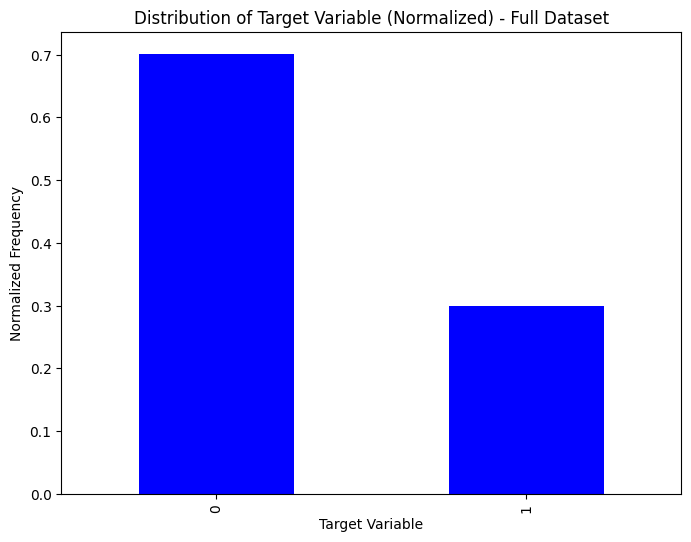

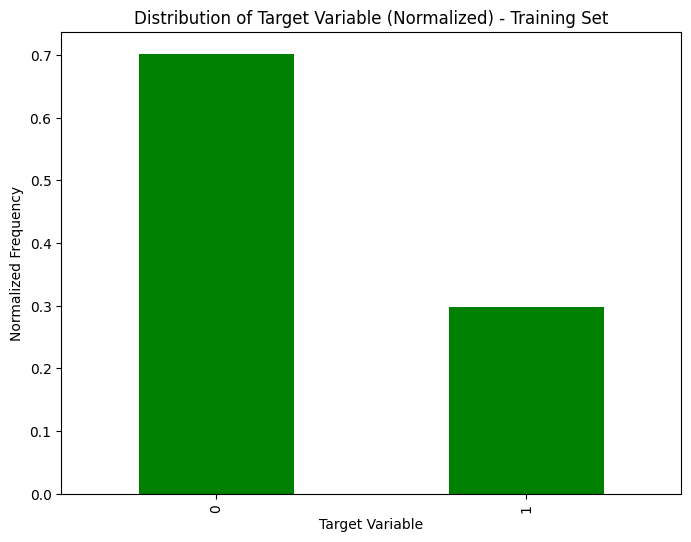

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X = df_analysis
y = data['DEFAULT'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

y_train_value_counts_normalized = y_train.value_counts(normalize=True)

plt.figure(figsize=(8, 6))
value_counts_normalized = y.value_counts(normalize=True)
value_counts_normalized.plot(kind='bar', color='blue')
plt.title('Distribution of Target Variable (Normalized) - Full Dataset')
plt.xlabel('Target Variable')
plt.ylabel('Normalized Frequency')
plt.show()

plt.figure(figsize=(8, 6))
y_train_value_counts_normalized.plot(kind='bar', color='green')
plt.title('Distribution of Target Variable (Normalized) - Training Set')
plt.xlabel('Target Variable')
plt.ylabel('Normalized Frequency')
plt.show()


In [ ]:
X_test.shape

(160, 19)

[0.4753503203392029, 0.8266666531562805]
8/8 [==============================] - 0s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.72      0.81       113
           1       0.77      0.94      0.84       112

    accuracy                           0.83       225
   macro avg       0.84      0.83      0.82       225
weighted avg       0.84      0.83      0.82       225



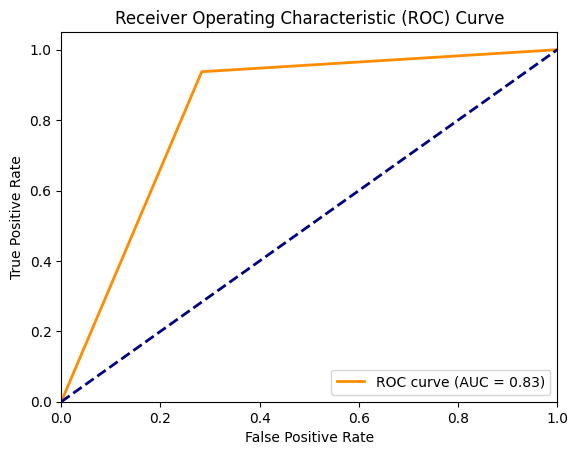

In [ ]:
from tensorflow import keras
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(X_train.shape[1], input_dim=X_train.shape[1], activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

    if weights == -1:
        model.fit(X_train, y_train, epochs=100, verbose=0)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight=weights, verbose=0)

    print(model.evaluate(X_test, y_test, verbose=0))

    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)

    print("Classification Report: \n", classification_report(y_test, y_preds))

    fpr, tpr, thresholds = roc_curve(y_test, y_preds.flatten())
    roc_auc = roc_auc_score(y_test, y_preds.flatten())

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

    return model, y_preds

loss_function = 'binary_crossentropy'
class_weights = {0: 1.0, 1: 1.0}

model, y_preds = ANN(X_train, y_train, X_test, y_test, loss_function, -1)


## RETRAINING TO ADDRESS DATA IMBALANCE

Random over-sampling:
0    561
1    561
Name: DEFAULT, dtype: int64


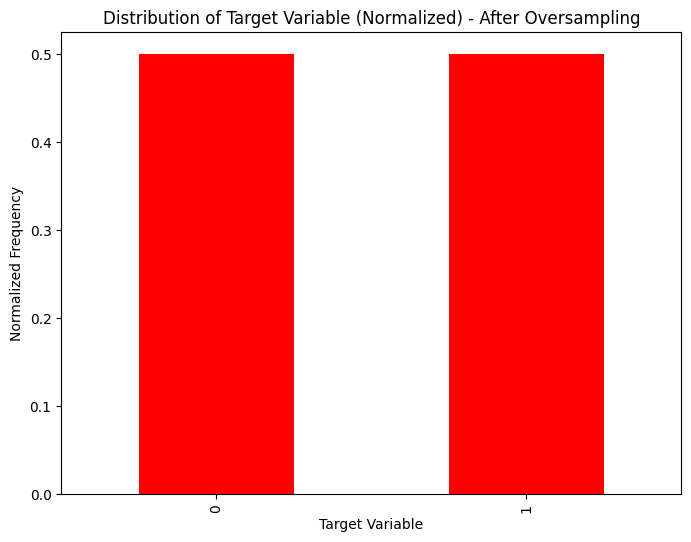

In [ ]:
from sklearn.utils import resample

df_analysis['DEFAULT'] = data['DEFAULT']

df_majority = df_analysis[df_analysis['DEFAULT'] == 0]
df_minority = df_analysis[df_analysis['DEFAULT'] == 1]

df_minority_upsampled = resample(df_minority,
                                 replace=True,
                                 n_samples=len(df_majority),
                                 random_state=123)

df_upsampled = pd.concat([df_majority, df_minority_upsampled])

print('Random over-sampling:')
print(df_upsampled['DEFAULT'].value_counts())

value_counts_normalized = df_upsampled['DEFAULT'].value_counts(normalize=True)

plt.figure(figsize=(8, 6))
value_counts_normalized.plot(kind='bar', color='red')
plt.title('Distribution of Target Variable (Normalized) - After Oversampling')
plt.xlabel('Target Variable')
plt.ylabel('Normalized Frequency')
plt.show()


[0.4880453944206238, 0.8177777528762817]
8/8 [==============================] - 0s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.75      0.81       113
           1       0.78      0.88      0.83       112

    accuracy                           0.82       225
   macro avg       0.82      0.82      0.82       225
weighted avg       0.82      0.82      0.82       225



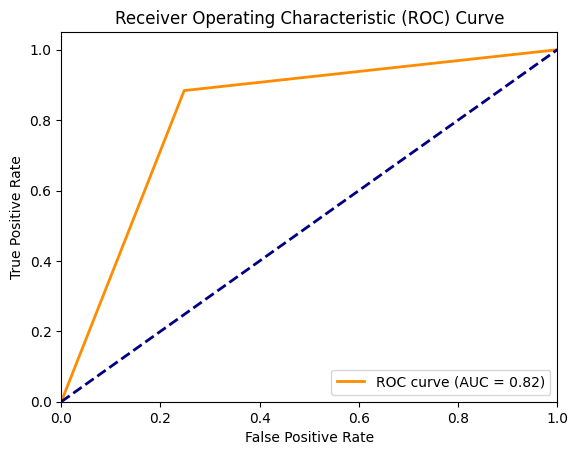

In [ ]:
from sklearn.model_selection import train_test_split

X = df_upsampled.drop('DEFAULT', axis='columns')
y = df_upsampled['DEFAULT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

# SAVING AND UTILIZING MODEL ON UNSEEN SET OF DATA

In [ ]:
model.save('/content/my_model2')

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE

new_data = pd.read_csv("/content/Last_200_Rows.csv")

scaler = StandardScaler()

numerical_columns = ['DURATION', 'AMOUNT', 'AGE', 'INSTALL_RATE', 'NUM_CREDITS', 'NUM_DEPENDENTS']
binary_columns = ['NEW_CAR', 'USED_CAR', 'FURNITURE', 'RADIO/TV', 'EDUCATION', 'RETRAINING', 'MALE_DIV', 'MALE_SINGLE', 'MALE_MAR_or_WID', 'CO-APPLICANT', 'GUARANTOR', 'REAL_ESTATE', 'PROP_UNKN_NONE', 'OTHER_INSTALL', 'RENT', 'OWN_RES', 'TELEPHONE', 'FOREIGN']
categorical_columns = ['CHK_ACCT', 'HISTORY', 'SAV_ACCT', 'EMPLOYMENT', 'PRESENT_RESIDENT', 'JOB']

new_data[numerical_columns] = scaler.fit_transform(new_data[numerical_columns])

new_data[binary_columns] = new_data[binary_columns].astype(int)

new_data = pd.get_dummies(new_data, columns=categorical_columns, drop_first=True)

y_new = new_data['DEFAULT']
X_new = new_data.drop('DEFAULT', axis=1)

smote = SMOTE(sampling_strategy='minority')
X_new_sm, y_new_sm = smote.fit_resample(X_new, y_new)

final_features = [
    'DURATION', 'AMOUNT', 'INSTALL_RATE', 'AGE', 'USED_CAR', 'MALE_SINGLE',
    'REAL_ESTATE', 'PROP_UNKN_NONE', 'OTHER_INSTALL', 'FOREIGN', 'CHK_ACCT_1',
    'CHK_ACCT_2', 'CHK_ACCT_3', 'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
    'SAV_ACCT_3', 'SAV_ACCT_4', 'PRESENT_RESIDENT_2'
]

for feature in final_features:
    if feature not in X_new_sm.columns:
        X_new_sm[feature] = 0

X_new_sm_final = X_new_sm[final_features]

model = load_model('/content/my_model2')

predictions = model.predict(X_new_sm_final)

print("Classification Report:\n", classification_report(y_new_sm, np.round(predictions)))

print(y_new_sm.value_counts())

print(X_new_sm_final.shape)


9/9 [==============================] - 0s 3ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.76      0.73       139
           1       0.74      0.70      0.72       139

    accuracy                           0.73       278
   macro avg       0.73      0.73      0.73       278
weighted avg       0.73      0.73      0.73       278

0    139
1    139
Name: DEFAULT, dtype: int64
(278, 19)
